In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
# data
advertising = pd.read_csv("fbdata.csv")

In [3]:
# abbreviate some variable names
advertising.fillna(0, inplace=True)
advertising = advertising.rename(columns={"Total_Conversion": "conv", "Impressions": "impr", "Approved_Conversion": "appConv", "xyz_campaign_id": "xyzID", "fb_campaign_id": "fbID" })
print(advertising.head())

    ad_id  xyzID    fbID    age gender  interest   impr  Clicks  Spent  conv  \
0  708746    916  103916  30-34      M        15   7350       1   1.43     2   
1  708749    916  103917  30-34      M        16  17861       2   1.82     2   
2  708771    916  103920  30-34      M        20    693       0   0.00     1   
3  708815    916  103928  30-34      M        28   4259       1   1.25     1   
4  708818    916  103928  30-34      M        28   4133       1   1.29     1   

   appConv  
0        1  
1        0  
2        0  
3        0  
4        1  


In [4]:
#Creating additional features: 
#advertising.fillna(0, inplace=True)
advertising['CTR'] = 100 * advertising['Clicks'] / advertising['impr']
advertising['CPC'] = advertising['Spent'] / advertising['Clicks']
advertising['CPI'] = advertising['Spent'] / advertising['impr']
advertising.head()

,ad_id,xyzID,fbID,age,gender,interest,impr,Clicks,Spent,conv,appConv,CTR,CPC,CPI
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,0.000195
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.000102
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.000293
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,0.000312


In [5]:
#advertising['Spent'] = np.log(advertising['Spent'])

In [6]:
advertising.fillna(0, inplace=True)
# Prepare the data for linear regression
X = advertising[['Clicks', 'impr', 'interest', 'conv', 'ad_id','ad_id','xyzID','fbID',	'appConv',	'CTR',	'CPC',	'CPI']]
y = advertising['Spent']
# normalizing 
scaler = StandardScaler()
# Fit the scaler on the training data and transform the data
X = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [9]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [10]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

ValueError: Input y contains infinity or a value too large for dtype('float64').

In [38]:
#Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 3.0646135321435826
MSE: 35.97040851713884
RMSE: 5.99753353614124
R2 Score: 0.994190903782374
------------------------------
RMSE Cross-Validation: 6.5951013825653675


In [39]:
#Lasso Regression 
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 3.2992525101113754
MSE: 43.29259388710292
RMSE: 6.579710775338299
R2 Score: 0.9930083962410113
------------------------------
RMSE Cross-Validation: 6.544627401694376


In [40]:
#Elastic Net
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 11.465265794665681
MSE: 316.08375555556927
RMSE: 17.778744487605678
R2 Score: 0.9489535697662149
------------------------------
RMSE Cross-Validation: 22.595274599561485


In [41]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.081095343913401
MSE: 31.423287051997743
RMSE: 5.605647781657152
R2 Score: 0.994925248127995
------------------------------
RMSE Cross-Validation: 7.754992912202335


In [42]:
# Create a Decision Tree Regressor model
dtr = DecisionTreeRegressor()

# Compute the RMSE using cross-validation
rmse_cv_score = rmse_cv(dtr)

# Fit the model to the data and make predictions
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

# Compute the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(dtr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "DecisionTree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.221921493126638
MSE: 28.099161194964562
RMSE: 5.300864193220249
R2 Score: 0.9954620829246807
------------------------------
RMSE Cross-Validation: 9.991596326997897


In [43]:
# Create a Linear Regression model as the base estimator for the Bagging model
lr = LinearRegression()

# Create a Bagging Regressor model with 10 estimators
bagging = BaggingRegressor(base_estimator=lr, n_estimators=10)

# Compute the RMSE using cross-validation
rmse_cv_score = rmse_cv(bagging)

# Fit the model to the data and make predictions
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

# Compute the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(bagging)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Bagging","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 3.090524741017522
MSE: 36.935119273641526
RMSE: 6.077427027422174
R2 Score: 0.9940351063411513
------------------------------
RMSE Cross-Validation: 6.698716862500947


In [44]:
 #Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Compute the RMSE using cross-validation
rmse_cv_score = rmse_cv(gbr)

# Fit the model to the data and make predictions
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Compute the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(gbr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "GradientBoosting","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.6452467644546112
MSE: 15.988278133559321
RMSE: 3.9985344982329867
R2 Score: 0.9974179485343415
------------------------------
RMSE Cross-Validation: 6.214962404747529


In [45]:
#XGBoost Regressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 1.6661628393728694
MSE: 32.75213355959745
RMSE: 5.722947978061434
R2 Score: 0.9947106440259197
------------------------------
RMSE Cross-Validation: 7.294407742638822


In [46]:
#Support Vector Machines
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.1063689591080557
MSE: 111.06576230528582
RMSE: 10.538774231630821
R2 Score: 0.9820632646024031
------------------------------
RMSE Cross-Validation: 23.944916676931108


In [47]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5.592140045546647e-13
MSE: 6.551273744466434e-25
RMSE: 8.093993911825258e-13
R2 Score: 1.0
------------------------------
RMSE Cross-Validation: 6.720945976469454


In [48]:
#Model Comparison 
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
7,GradientBoosting,1.645247e+00,1.598828e+01,3.998534e+00,0.997418,6.214962
2,Lasso,3.299253e+00,4.329259e+01,6.579711e+00,0.993008,6.544627
1,Ridge,3.064614e+00,3.597041e+01,5.997534e+00,0.994191,6.595101
6,Bagging,3.090525e+00,3.693512e+01,6.077427e+00,0.994035,6.698717
0,LinearRegression,3.069179e+00,3.578073e+01,5.981699e+00,0.994222,6.720946
10,Polynomial Regression (degree=2),5.592140e-13,6.551274e-25,8.093994e-13,1.000000,6.720946
8,XGBRegressor,1.666163e+00,3.275213e+01,5.722948e+00,0.994711,7.294408
4,RandomForestRegressor,2.081095e+00,3.142329e+01,5.605648e+00,0.994925,7.754993
5,DecisionTree,2.221921e+00,2.809916e+01,5.300864e+00,0.995462,9.991596
3,ElasticNet,1.146527e+01,3.160838e+02,1.777874e+01,0.948954,22.595275


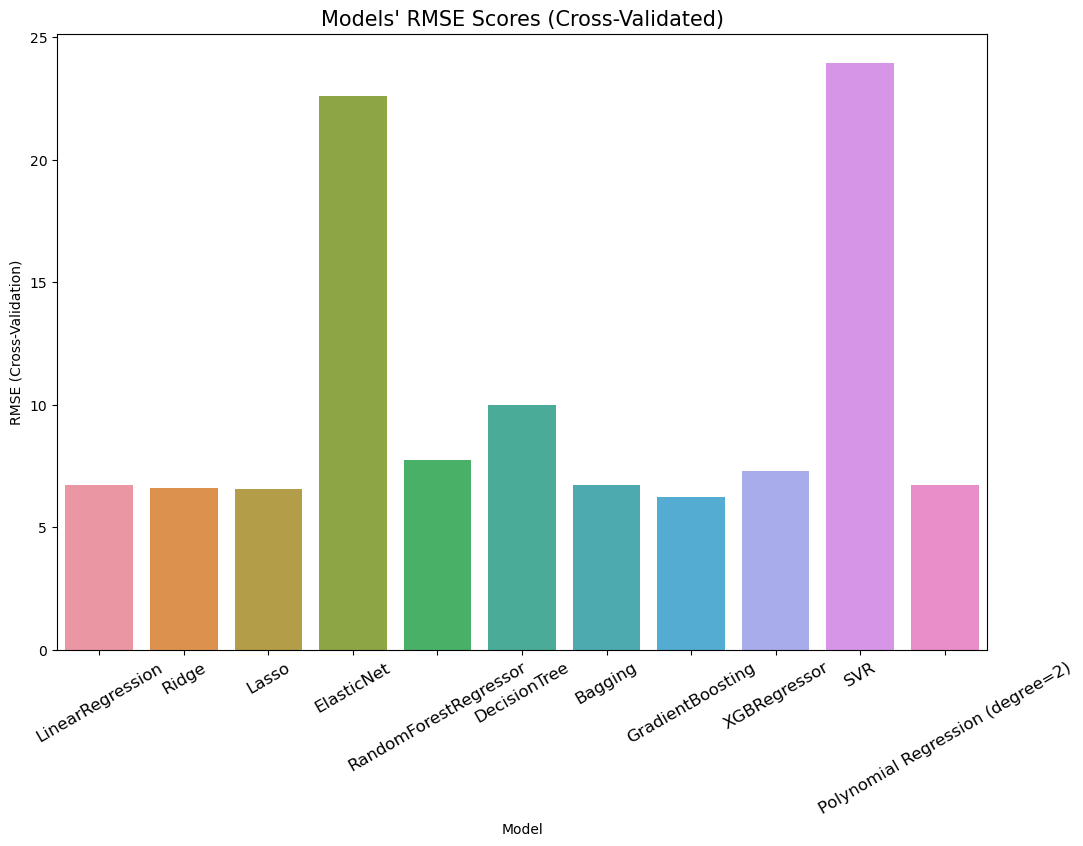

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()